<a href="https://colab.research.google.com/github/Nadiana-Kelly/Aprendizagem_Automatica/blob/main/Lista01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1ª QUESTÃO

Considere o conjunto de dados disponível em artificial1d.csv, organizado em duas colunas, x e y. Seja um modelo de regressão linear para $\hat{y} = f(x)$.

**a)** Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.




Parâmetros do modelo:
  Intercepto (w0): 0.0676
  Coeficiente (w1): 1.5749

Erro Quadrático Médio (MSE): 0.2134


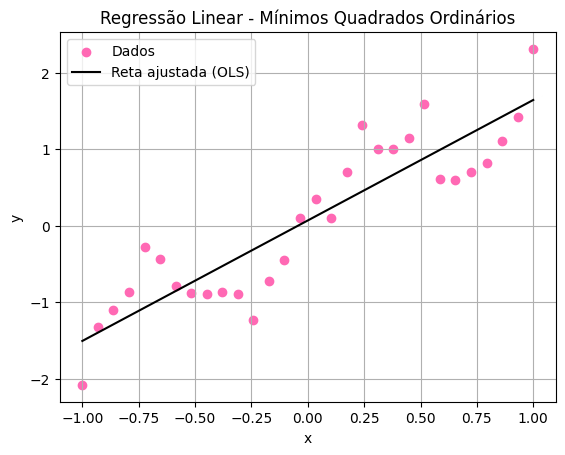

In [9]:
dados = np.genfromtxt('artificial1d.csv', delimiter=',')

n = dados.shape[0]

X = np.array(np.c_[np.ones(n), dados[:, 0]])

y = dados[:, [1]]

w = np.linalg.inv(X.T @ X) @ X.T @ y

y_chapeu = X @ w

MSE = np.mean((y - y_chapeu) ** 2)

print(f"Parâmetros do modelo:")
print(f"  Intercepto (w0): {w[0][0]:.4f}")
print(f"  Coeficiente (w1): {w[1][0]:.4f}")
print(f"\nErro Quadrático Médio (MSE): {MSE:.4f}")

# Plotando os dados e a reta
x = dados[:, 0]
y_pred = y_chapeu.flatten()

plt.scatter(x, y, color='hotpink', label='Dados')
plt.plot(x, y_pred, color='black', label='Reta ajustada (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear - Mínimos Quadrados Ordinários')
plt.legend()
plt.grid(True)
plt.show()


b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

Parâmetros do modelo:
  Intercepto (w0): 0.0677
  Coeficiente (w1): 1.5587

Erro Quadrático Médio (MSE): 0.21349499994349924


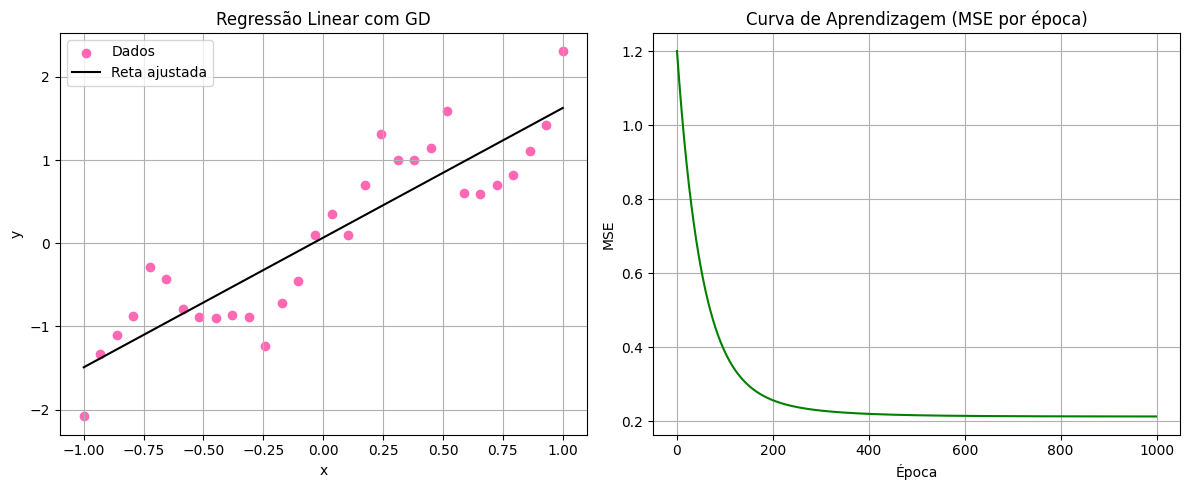

In [10]:
dados = np.genfromtxt('artificial1d.csv', delimiter=',')

w0 = 1
w1 = 1
alpha = 0.01
n = dados.shape[0]
y_chapeu = [0]*n
e = [0]*n
i = 0
mse_list = []
x_axis = dados[:,0]

for t in range(1000):

  for x,y in dados:
    y_chapeu[i] = w0 + w1 * x
    e[i] = y-y_chapeu[i]
    i=i+1

  w0 = w0 + alpha * (np.sum(e))/n
  w1 = w1 + alpha * (np.sum([e[i] * x_axis[i] for i in range(n)])) /n
  i = 0

  mse = np.mean([err ** 2 for err in e])
  mse_list.append(mse)

print(f"Parâmetros do modelo:")
print(f"  Intercepto (w0): {w0:.4f}")
print(f"  Coeficiente (w1): {w1:.4f}")
print(f"\nErro Quadrático Médio (MSE): {mse_list[-1]}")

# Plot da reta ajustada
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(dados[:,0], dados[:,1], label='Dados', color='hotpink')
x_vals = np.linspace(min(x_axis), max(x_axis), 100)
y_vals = w0 + w1 * x_vals
plt.plot(x_vals, y_vals, color='black', label='Reta ajustada')
plt.title('Regressão Linear com GD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot da curva de aprendizagem
plt.subplot(1, 2, 2)
plt.plot(mse_list, color='green')
plt.title('Curva de Aprendizagem (MSE por época)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

Parâmetros do modelo:
  Intercepto (w0): 0.1265
  Coeficiente (w1): 1.6024

Erro Quadrático Médio (MSE): 0.21635728877896546


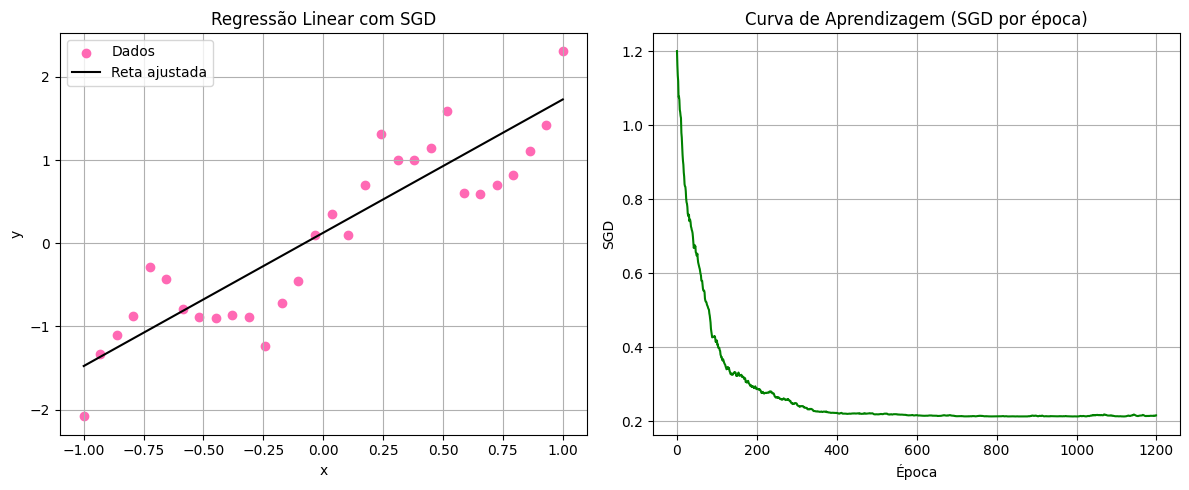

In [11]:
dados = np.genfromtxt('artificial1d.csv', delimiter=',')

w0 = 1
w1 = 1
alpha = 0.01
n = dados.shape[0]
y_chapeu = [0]*n
e = [0]*n
i = 0
mse_list = []
x_axis = dados[:,0]

for t in range(1200):
  data_permutaded = np.random.permutation(dados)
  mse = 0.00
  new_w0 = w0
  new_w1 = w1
  for x,y in data_permutaded:
    y_chapeu = w0 + w1 * x
    e[i] = y-y_chapeu

    new_w0 = w0 + alpha * e[i]
    new_w1 = w1 + alpha * e[i] * x

    i=i+1

  mse = np.mean([err ** 2 for err in e])
  mse_list.append(mse)

  w0 = new_w0
  w1 = new_w1

  i = 0

print(f"Parâmetros do modelo:")
print(f"  Intercepto (w0): {w0:.4f}")
print(f"  Coeficiente (w1): {w1:.4f}")
print(f"\nErro Quadrático Médio (MSE): {mse_list[-1]}")

# Plot da reta ajustada
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(dados[:,0], dados[:,1], label='Dados', color='hotpink')
x_vals = np.linspace(min(x_axis), max(x_axis), 100)
y_vals = w0 + w1 * x_vals
plt.plot(x_vals, y_vals, color='black', label='Reta ajustada')
plt.title('Regressão Linear com SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot da curva de aprendizagem
plt.subplot(1, 2, 2)
plt.plot(mse_list, color='green')
plt.title('Curva de Aprendizagem (SGD por época)')
plt.xlabel('Época')
plt.ylabel('SGD')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2ª QUESTÃO

Considere o conjunto de dados disponível em california.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_
world.html#california-housing-dataset.

a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [ ]:
dados_california = np.genfromtxt('california.csv', delimiter=',')

X = dados_california[:, :-1]
y = dados_california[:, -1]

np.random.seed(42)

indices = np.random.permutation(X.shape[0])

X = X[indices]
y = y[indices]

n_treino = int(0.8 * X.shape[0])

X_treino = X[:n_treino]
X_teste = X[n_treino:]
y_treino = y[:n_treino]
y_teste = y[n_treino:]

b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
pode usar o algoritmo OLS.

c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
e no teste para cada modelo. Faça um gráfico para o treino e um gráfico
para o teste.

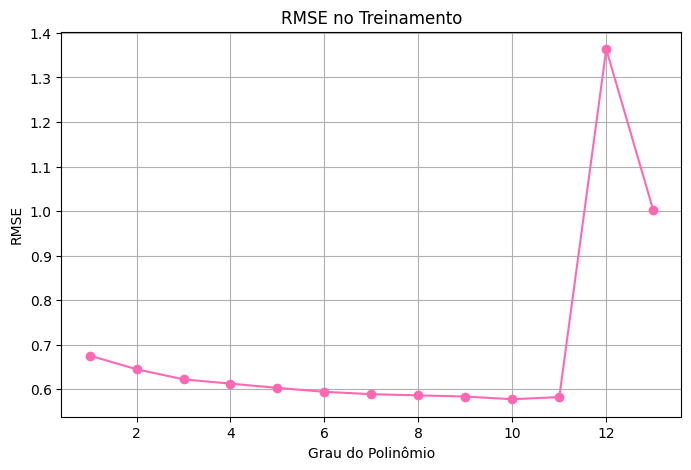

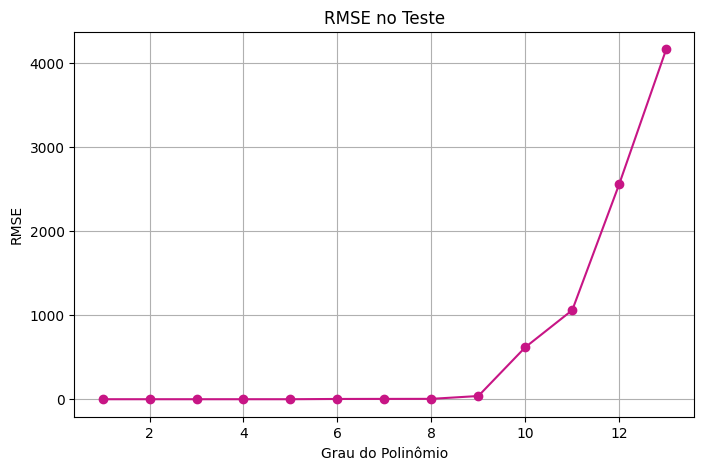

In [ ]:
#normalização dos dados usando (a saída com StandardScaler e as entradas com MinMax)

X_min = X_treino.min(axis=0)
X_max = X_treino.max(axis=0)
X_treino_norm = (X_treino - X_min) / (X_max - X_min)
X_teste_norm = (X_teste - X_min) / (X_max - X_min)

y_mean = y_treino.mean()
y_std = y_treino.std()
y_treino_norm = (y_treino - y_mean) / y_std
y_teste_norm = (y_teste - y_mean) / y_std

#função para gerar as features polinomiais a partir das entradas
def gera_polinomios(X_entrada, grau):

    X_poly = X_entrada.copy()

    for grau_atual in range(2, grau + 1):
        X_potencia = X_entrada ** grau_atual
        X_poly = np.c_[X_poly, X_potencia]
    return X_poly

#treinamento dos 13 modelos com ordens de 1 a 13 utilizando o algoritmo OLS

RMSE_treino = []
RMSE_teste = []

for grau in range(1, 14):

  X_treino_polinomial = gera_polinomios(X_treino_norm, grau)
  X_teste_polinomial = gera_polinomios(X_teste_norm, grau)

  X_treino_polinomial = np.c_[np.ones(X_treino_polinomial.shape[0]), X_treino_polinomial]
  X_teste_polinomial = np.c_[np.ones(X_teste_polinomial.shape[0]), X_teste_polinomial]

  #aplicando OLS
  w_ols = np.linalg.inv(X_treino_polinomial.T @ X_treino_polinomial) @ X_treino_polinomial.T @ y_treino_norm.reshape(-1, 1)

  y_teste_predito = X_teste_polinomial @ w_ols
  y_treino_predito = X_treino_polinomial @ w_ols

  #desnormalizando
  y_treino_predito_desnorm = (y_treino_predito * y_std) + y_mean
  y_teste_predito_desnorm = (y_teste_predito * y_std) + y_mean

  #RMSE
  RMSE_train = np.sqrt(np.mean((y_treino - y_treino_predito_desnorm.flatten())**2))
  RMSE_test = np.sqrt(np.mean((y_teste - y_teste_predito_desnorm.flatten())**2))

  RMSE_treino.append(RMSE_train)
  RMSE_teste.append(RMSE_test)

#plotando os gráficos
graus = range(1, 14)

plt.figure(figsize=(8, 5))
plt.plot(graus, RMSE_treino, marker='o', color='#FF69B4')
plt.title('RMSE no Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(graus, RMSE_teste, marker='o', color='#C71585')
plt.title('RMSE no Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


d) Repita os 2 itens anteriores incluindo um termo de regularização L2
(por exemplo, com fator λ = 0.01).

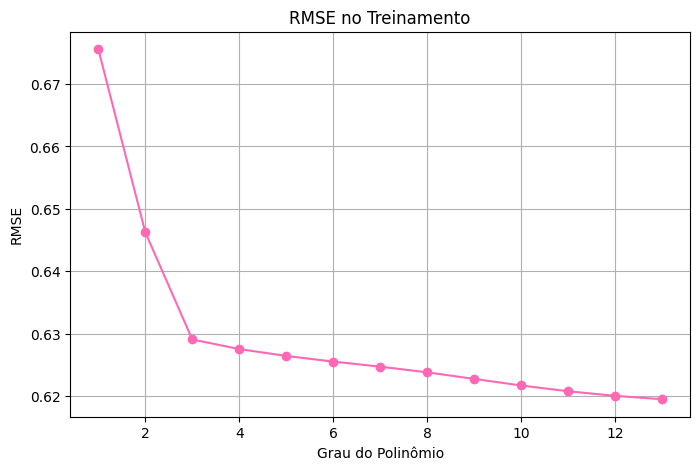

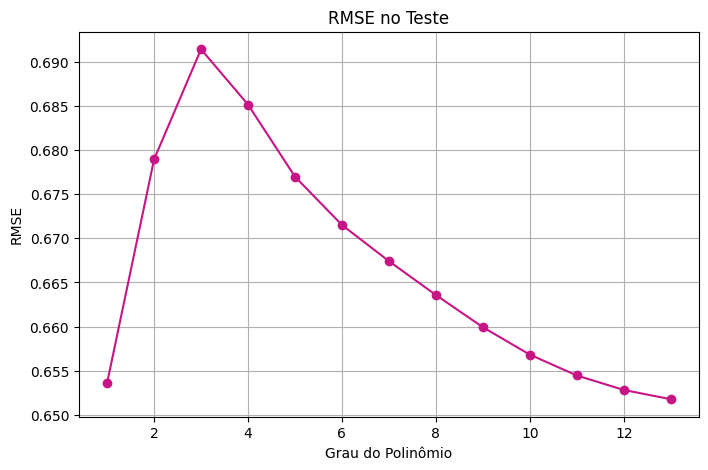

In [ ]:
#normalização dos dados usando (a saída com StandardScaler e as entradas com MinMax)

X_min = X_treino.min(axis=0)
X_max = X_treino.max(axis=0)
X_treino_norm = (X_treino - X_min) / (X_max - X_min)
X_teste_norm = (X_teste - X_min) / (X_max - X_min)

y_mean = y_treino.mean()
y_std = y_treino.std()
y_treino_norm = (y_treino - y_mean) / y_std
y_teste_norm = (y_teste - y_mean) / y_std

#função para gerar as features polinomiais a partir das entradas
def gera_polinomios(X_entrada, grau):

    X_poly = X_entrada.copy()

    for grau_atual in range(2, grau + 1):
        X_potencia = X_entrada ** grau_atual
        X_poly = np.c_[X_poly, X_potencia]
    return X_poly

#fator de regularização
lambda_reg = 0.01

#treinamento dos 13 modelos com ordens de 1 a 13 utilizando o algoritmo OLS

RMSE_treino = []
RMSE_teste = []

for grau in range(1, 14):

  X_treino_polinomial = gera_polinomios(X_treino_norm, grau)
  X_teste_polinomial = gera_polinomios(X_teste_norm, grau)

  X_treino_polinomial = np.c_[np.ones(X_treino_polinomial.shape[0]), X_treino_polinomial]
  X_teste_polinomial = np.c_[np.ones(X_teste_polinomial.shape[0]), X_teste_polinomial]

  # Matriz identidade para regularização
  I = np.eye(X_treino_polinomial.shape[1])
  I[0, 0] = 0  # não regulariza o bias (primeira coluna)

  # Ridge Regression (OLS com L2)
  w_ridge = np.linalg.inv(X_treino_polinomial.T @ X_treino_polinomial + lambda_reg * I) @ X_treino_polinomial.T @ y_treino_norm.reshape(-1, 1)

  y_teste_predito = X_teste_polinomial @ w_ridge
  y_treino_predito = X_treino_polinomial @ w_ridge

  #desnormalizando
  y_treino_predito_desnorm = (y_treino_predito * y_std) + y_mean
  y_teste_predito_desnorm = (y_teste_predito * y_std) + y_mean

  #RMSE
  RMSE_train = np.sqrt(np.mean((y_treino - y_treino_predito_desnorm.flatten())**2))
  RMSE_test = np.sqrt(np.mean((y_teste - y_teste_predito_desnorm.flatten())**2))

  RMSE_treino.append(RMSE_train)
  RMSE_teste.append(RMSE_test)

#plotando os gráficos
graus = range(1, 14)

plt.figure(figsize=(8, 5))
plt.plot(graus, RMSE_treino, marker='o', color='#FF69B4')
plt.title('RMSE no Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(graus, RMSE_teste, marker='o', color='#C71585')
plt.title('RMSE no Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()